# EDA

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import calendar
%matplotlib inline

In [3]:
# read data
df_fake: pd.DataFrame = pd.read_csv('../data/Fake.csv')
df_true: pd.DataFrame = pd.read_csv('../data/True.csv')

In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [6]:
# create a target variable (fake = 1, true = 0)
df_fake['label'] = 1
df_true['label'] = 0

In [7]:
df = pd.concat([df_fake, df_true], axis=0)

In [8]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [9]:
del df_true, df_fake

In [10]:
# shuffle the rows
df = df.sample(frac=1, random_state=104).reset_index()
df.head()

,index,title,text,subject,date,label
0,7630,Supreme Court Just Delivered HUGE Win For Sam...,"In big news coming out of the Supreme Court, i...",News,"March 7, 2016",1
1,22964,BREAKING: Wikileaks To Give Tech Companies Exc...,21st Century Wire says Wikileaks founder Julia...,Middle-east,"March 9, 2017",1
2,15647,NO TRANSPARENCY ON TRADE BILL FROM THE MOST TR...,WHEN YOU AGREE WITH LIZ WARREN YOU KNOW SOMETH...,politics,"May 22, 2015",1
3,2927,Trump to Senate Republicans: kill Obamacare no...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 30, 2017",0
4,18230,NBC PUTS VIEWERS Out Of Their Misery…Cancels D...,The initial run of Megyn Kelly s Sunday newsma...,left-news,"Jul 30, 2017",1


In [11]:
# how many subjects are there
df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [12]:
# fix date
df['date'] = df['date'].str.rstrip()
df['month'] = (df['date'].str.extract(r'(^\w+)', expand=True)
 .replace([month_name for month_name in calendar.month_name], [i for i in range(13)])
.replace([month_name for month_name in calendar.month_abbr], [i for i in range(13)]))
df['day'] = df['date'].str.extract(r'(\d+)', expand=True)
df['year'] = df['date'].str.extract(r'(\d+$)', expand=True)

I want to see the percentage or the levels of fake items along the years to see if there is a valuable information in the date itself.

In [13]:
df_plot = df.copy()

In [14]:
# construct a full date column
df_plot['num_date'] = pd.to_datetime(df_plot[['year','month','day']])

ValueError: Unable to parse string "https" at position 1949

Oops! It looks like our part-of-date extraction wasn't that great, let's examine it

In [15]:
df_plot.loc[[1949]]

,index,title,text,subject,date,label,month,day,year
1949,15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1,https,2015,NaN


Let's examine how many rows we have that the title or the text are actually some sort of links

In [18]:
df_plot['title'].str.startswith('http').sum()

9

In [19]:
df_plot['text'].str.startswith('http').sum()

94

In [20]:
df_plot[df_plot['text'].str.startswith('http')]

,index,title,text,subject,date,label,month,day,year
361,11660,TOMI LAHREN Blasts The Left For Attacking Trum...,https://www.youtube.com/watch?time_continue=1&...,politics,"Feb 14, 2017",1,2,14,2017
404,12064,GIVE ‘EM HELL JESSE: Shouldn’t you Democrats s...,https://www.youtube.com/watch?v=wYdX071Nlow,politics,"Dec 26, 2016",1,12,26,2016
628,12252,THE VIEW’S Whoopi Goldberg To Co-Host: “This I...,https://youtu.be/RTuxvWjH3a4,politics,"Dec 1, 2016",1,12,1,2016
1566,12328,COMEDIAN TIM ALLEN On Hollywood Hypocrites: Th...,https://youtu.be/0J4xPRYbsLU,politics,"Nov 22, 2016",1,11,22,2016
1827,19689,BREAKING FL VOTER FRAUD ALERT: “Tens Of Thousa...,https://twitter.com/TEN_GOP/status/79389017105...,left-news,"Nov 2, 2016",1,11,2,2016
...,...,...,...,...,...,...,...,...,...
41157,19136,TOMI LAHREN Blasts The Left For Attacking Trum...,https://www.youtube.com/watch?time_continue=1&...,left-news,"Feb 14, 2017",1,2,14,2017
41946,12524,BREAKING FL VOTER FRAUD ALERT: “Tens Of Thousa...,https://twitter.com/TEN_GOP/status/79389017105...,politics,"Nov 2, 2016",1,11,2,2016
42223,12183,TUCKER CARLSON DESTROYS Smug Elector Who Refus...,https://youtu.be/7oOhwHG2Gb4,politics,"Dec 9, 2016",1,12,9,2016
42522,11730,“F*ck Trump! F*ck White People!” LEFTY GOES NU...,https://www.youtube.com/watch?v=zZ7GrEItGoo,politics,"Feb 5, 2017",1,2,5,2017


Hmm, I wonder what is the class (label) distribution among those

In [22]:
df_plot[df_plot['text'].str.startswith('http')]['label'].value_counts()

1    94
Name: label, dtype: int64

In [23]:
df_plot[df_plot['title'].str.startswith('http')]['label'].value_counts()

1    9
Name: label, dtype: int64

They are all fake news. Maybe the existence of a link will help us with classification later. For now, let's drop it just to be able to plot quickly with dates

In [24]:
df_plot.drop(df_plot[df_plot['title'].str.startswith('http')].index, axis=0, inplace=True)
df_plot.drop(df_plot[df_plot['text'].str.startswith('http')].index, axis=0, inplace=True)

In [25]:
# construct a full date column
df_plot['num_date'] = pd.to_datetime(df_plot[['year','month','day']])

ValueError: Unable to parse string "MSNBC" at position 13295

It seems we still have problems. Let's see where

In [27]:
df_plot.iloc[[13295]]

,index,title,text,subject,date,label,month,day,year
13325,18933,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,1,MSNBC,NaN,NaN


It looks like there are columns (at least 1 from what we know so far) that the date is not really a date. Let's look at those

In [28]:
df_plot[df_plot['year'].isnull()]

,index,title,text,subject,date,label,month,day,year
13325,18933,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,1,MSNBC,NaN,NaN


In [29]:
df_plot.isnull().sum()

index      0
title      0
text       0
subject    0
date       0
label      0
month      0
day        1
year       1
dtype: int64

So this was the only one. Let's remove it for now.

In [30]:
df_plot.drop(13325, axis=0, inplace=True)

In [31]:
# construct a full date column
df_plot['num_date'] = pd.to_datetime(df_plot[['year','month','day']])

In [34]:
df_plot.head()

,index,title,text,subject,date,label,month,day,year,num_date
0,7630,Supreme Court Just Delivered HUGE Win For Sam...,"In big news coming out of the Supreme Court, i...",News,"March 7, 2016",1,3,7,2016,2016-03-07
1,22964,BREAKING: Wikileaks To Give Tech Companies Exc...,21st Century Wire says Wikileaks founder Julia...,Middle-east,"March 9, 2017",1,3,9,2017,2017-03-09
2,15647,NO TRANSPARENCY ON TRADE BILL FROM THE MOST TR...,WHEN YOU AGREE WITH LIZ WARREN YOU KNOW SOMETH...,politics,"May 22, 2015",1,5,22,2015,2015-05-22
3,2927,Trump to Senate Republicans: kill Obamacare no...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 30, 2017",0,6,30,2017,2017-06-30
4,18230,NBC PUTS VIEWERS Out Of Their Misery…Cancels D...,The initial run of Megyn Kelly s Sunday newsma...,left-news,"Jul 30, 2017",1,7,30,2017,2017-07-30


In [35]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44803 entries, 0 to 44897
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     44803 non-null  int64         
 1   title     44803 non-null  object        
 2   text      44803 non-null  object        
 3   subject   44803 non-null  object        
 4   date      44803 non-null  object        
 5   label     44803 non-null  int64         
 6   month     44803 non-null  object        
 7   day       44803 non-null  object        
 8   year      44803 non-null  object        
 9   num_date  44803 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 3.8+ MB


In [39]:
df_plot['year'].value_counts()

2017    25853
2016    16436
2015     2479
18         35
Name: year, dtype: int64

What the hell?

In [40]:
df_plot[df_plot['year'] == 18]

,index,title,text,subject,date,label,month,day,year,num_date


We can't do that since the `day, month, year` columns are string columns. Let's convert it to numeric

In [41]:
for item in ['day', 'month', 'year']:
    df_plot[item] = pd.to_numeric(df_plot[item])

In [44]:
df_plot[df_plot['year'] == 18]

,index,title,text,subject,date,label,month,day,year,num_date
2439,9076,TWO HIGH SCHOOL JROTC Members Tell INCREDIBLE ...,ABC News When two Marjory Stoneman Douglas Hi...,politics,15-Feb-18,1,15,15,18,1815-01-05
2884,9057,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,politics,18-Feb-18,1,18,18,18,1818-01-08
4810,9054,DOJ’s JEFF SESSIONS Opens Investigation Into W...,Thank goodnesss Jeff Sessions is moving on fin...,politics,18-Feb-18,1,18,18,18,1818-01-08
4850,9060,LOCAL REPORTER IN DEEP BLUE STATE Stuns Libera...,"We took a very hard look at these numbers, an...",politics,17-Feb-18,1,17,17,18,1817-01-07
8662,9056,GOTCHA! A Stammering John Podesta Stunned by a...,John Podesta is Hillary Clinton s former campa...,politics,18-Feb-18,1,18,18,18,1818-01-08
10031,9066,"How The Left, The Anti Defamation League and M...",Immediately after the police identified the su...,politics,17-Feb-18,1,17,17,18,1817-01-07
10407,9080,JUST IN: Senate Rejects Immigration Bill…Trump...,How could the Senate be so lame in their effor...,politics,15-Feb-18,1,15,15,18,1815-01-05
10443,9058,IT BEGINS…RINO MEGA-DONOR Threatens Jeb Bush: ...,A longtime Republican Party donor based in Flo...,politics,18-Feb-18,1,18,18,18,1818-01-08
11349,9079,“PROUD TRANSGENDER” Democrat Candidate For Con...,"WQOW -A Lacrosse, WI transgender person, who r...",politics,15-Feb-18,1,15,15,18,1815-01-05
16485,9065,“THE TRUMP CURSE IS REAL”…Social Media Respond...,Two months before the Winter Olympics in Seoul...,politics,17-Feb-18,1,17,17,18,1817-01-07


In [45]:
df_plot[df_plot['year'] == 18].tail()

,index,title,text,subject,date,label,month,day,year,num_date
40227,9084,JUST IN: CROOKED DOJ OFFICIAL Didn’t Reveal Th...,We ve been covering the curious case of DOJ of...,politics,14-Feb-18,1,14,14,18,1814-01-04
40869,9073,WATCH SHERIFF’S Honest Response After a School...,"When it gets down to it, what this sheriff sai...",politics,16-Feb-18,1,16,16,18,1816-01-06
41222,9071,TUCKER CARLSON Rips The Left On Gun Control Hy...,Tucker Carlson weighed in on the hysteria over...,politics,16-Feb-18,1,16,16,18,1816-01-06
41800,9069,BREAKING: FL GOV RICK SCOTT Calls for FBI Dire...,"While the left points the finger at guns, guns...",politics,16-Feb-18,1,16,16,18,1816-01-06
44309,9053,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politics,18-Feb-18,1,18,18,18,1818-01-08


We see 2 problems: First is that year should be 2018 instead of 18, and the month conversion got screwed up, but it's all February so let's just change that manually. I just want to be able to plot!

In [46]:
df_plot.loc[df_plot['year'] == 18, 'year'] = 2018

In [47]:
df_plot.loc[df_plot['month'] > 12, 'month'] = 2

In [48]:
df_plot['month'].value_counts().reset_index().sort_values(by='index')

,index,month
5,1,3090
8,2,2940
4,3,3320
7,4,3032
6,5,3076
9,6,2896
11,7,2829
10,8,2829
2,9,5199
1,10,5475


In [49]:
# construct the full date one more time
df_plot['num_date'] = pd.to_datetime(df_plot[['year','month','day']])

In [50]:
df_plot.head()

,index,title,text,subject,date,label,month,day,year,num_date
0,7630,Supreme Court Just Delivered HUGE Win For Sam...,"In big news coming out of the Supreme Court, i...",News,"March 7, 2016",1,3,7,2016,2016-03-07
1,22964,BREAKING: Wikileaks To Give Tech Companies Exc...,21st Century Wire says Wikileaks founder Julia...,Middle-east,"March 9, 2017",1,3,9,2017,2017-03-09
2,15647,NO TRANSPARENCY ON TRADE BILL FROM THE MOST TR...,WHEN YOU AGREE WITH LIZ WARREN YOU KNOW SOMETH...,politics,"May 22, 2015",1,5,22,2015,2015-05-22
3,2927,Trump to Senate Republicans: kill Obamacare no...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 30, 2017",0,6,30,2017,2017-06-30
4,18230,NBC PUTS VIEWERS Out Of Their Misery…Cancels D...,The initial run of Megyn Kelly s Sunday newsma...,left-news,"Jul 30, 2017",1,7,30,2017,2017-07-30


In [51]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44803 entries, 0 to 44897
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     44803 non-null  int64         
 1   title     44803 non-null  object        
 2   text      44803 non-null  object        
 3   subject   44803 non-null  object        
 4   date      44803 non-null  object        
 5   label     44803 non-null  int64         
 6   month     44803 non-null  int64         
 7   day       44803 non-null  int64         
 8   year      44803 non-null  int64         
 9   num_date  44803 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 3.8+ MB


Let's look at the percentage of fake news at each day over the years

(array([735719., 735842., 735964., 736085., 736208., 736330., 736450.,
        736573., 736695.]),
 <a list of 9 Text major ticklabel objects>)

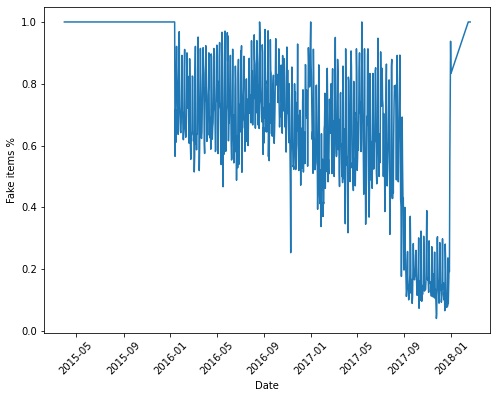

In [56]:
df_prog_label = df_plot.groupby('num_date')['label'].apply(lambda x: sum(x)/len(x)).reset_index().sort_values(by='label')
plt.figure(figsize=(8,6))
sns.lineplot(x='num_date', y='label', data=df_prog_label)
plt.ylabel('Fake items %')
plt.xlabel('Date')
plt.xticks(rotation=45)

And the levels

(array([735719., 735842., 735964., 736085., 736208., 736330., 736450.,
        736573., 736695.]),
 <a list of 9 Text major ticklabel objects>)

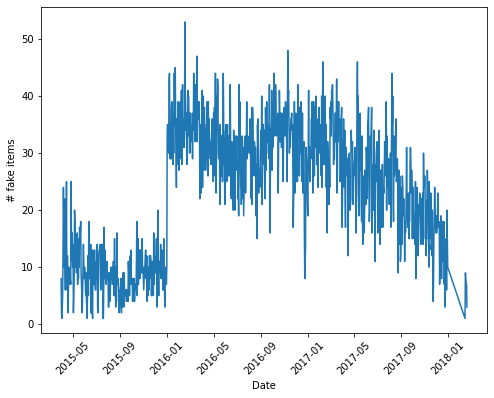

In [57]:
df_prog_label = df_plot.groupby('num_date')['label'].apply(lambda x: sum(x==1)).reset_index().sort_values(by='label')
plt.figure(figsize=(8,6))
sns.lineplot(x='num_date', y='label', data=df_prog_label)
plt.ylabel('# fake items')
plt.xlabel('Date')
plt.xticks(rotation=45)

This last plot makes sense. There is a big spike in 2016 which is the time when Trump got into running for presidency. Since then, there became a greater awareness for the existence of fake news (new companies that this was their focus were formed etc.) hence the curve started to fall eventually.